<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:130%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>Diabetes Prediction: From Logistic Regression to Advanced Ensemble Methods</b></div>

![diabetes](https://img.freepik.com/free-vector/diabetes-composition-with-icons-blood-glucose-monitor-insulin-pills-with-apple-doodle-human-characters-vector-illustration_1284-83910.jpg?t=st=1721420676~exp=1721424276~hmac=2dd49a06c84235a07effcbd35f22d71ba2bd732d80a4f14d2a9f7939f39caedf&w=2000)

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#intro">1. Introduction</a>
- <a href="#libraries">2. Importing Required Libraries</a>
- <a href="#data">3. Reading and Understanding Data</a>
- <a href="#eda">4. Exploratory Data Analysis</a>
    - <a href="#zero">4.1. Exploring and Dealing with Zeros</a>
    - <a href="#feat">4.2. Distribution of Features</a>  
    - <a href="#corr">4.3. Exploring Correlations</a>
    - <a href="#outliers">4.4. Exploring Outliers</a>    
    - <a href="#target">5.5. Distribution of a Target Variable</a>
- <a href="#prepr">5. Data Preprocessing</a>
    - <a href="#sep">5.1. Separate Features and Target</a>
    - <a href="#split">5.2. Train / Test Split</a>
    - <a href="#scale">5.3. Data Scaling</a>
- <a href="#ml">6. Modeling</a>
    - <a href="#lr">6.1. Logistic Regression</a>
    - <a href="#gbc">6.2. Random Forest Classifier</a>
- <a href="#conclusions">7. Conclusions</a>

<a id="intro"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 1. Introduction </b></div>

### About Dataset
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

### About Project
To analyze the data, we will leverage several popular Python packages for data science. Initially, pandas will be used to read and manipulate the data stored in a CSV file. With pandas and numpy, we will explore the dataset, examine its columns, and uncover relationships between various features. The data will then undergo cleaning and preparation for classification models, addressing missing values, outliers, and ensuring proper data types.

For visualizations, seaborn and matplotlib will be employed to create informative plots that illustrate data distributions and feature relationships.

For the classification models, we will try and compare different algorithms, ranging from Logistic Regression to CatBoost Classifier. Logistic Regression will be chosen for its interpretability and effectiveness with binary outcomes, while K-Nearest Neighbors (KNN) will be selected for its simplicity and non-parametric nature. We will also include more advanced models like Gradient Boosting and CatBoost Classifier to leverage their ability to handle complex relationships in the data.

These models will be evaluated using comprehensive classification reports that include metrics such as accuracy, precision, recall, and F1 score. By comparing the performance of these various models, we aim to identify the most accurate and reliable model for predicting diabetes based on the provided dataset.

By combining these tools and approaches, we aim to develop robust models that provide valuable insights and predictions.

<a id="libraries"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 2. Importing Required Libraries </b></div>

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

sns.set_theme(context='notebook', palette='muted', style='white')

<a id="data"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 3. Reading and Understanding our Data </b></div>

In [42]:
diabetes = pd.read_csv("/content/drive/MyDrive/dib/diabetes2.csv")

In [43]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>There are <strong>9 numerical columns</strong>, which are easily comprehensible by their names. Among them:
            <ul>
                <li><strong>Pregnancies</strong>: number of pregnancies. Range from 0 to 17.</li>
                <li><strong>Age</strong> is from 21 until 81.</li>
                <li><strong>Diabetes pedigree function (DPF)</strong> calculates diabetes likelihood depending on the subject's age and his/her diabetic family history.</li>
                <li><strong>BMI</strong>: body mass index.</li>
                <li><strong>Outcome</strong>: if the person has diabetes or not.</li>
            </ul>
        </li>
        <li>There are <strong>768 non-null rows</strong> in the dataset.</li>
        <li>Minimum values in most of the columns are <strong>0s</strong>, which doesn't make any sense. For example, glucose or blood pressure cannot be 0. </li>
    </ul>
</div>

<a id="eda"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 4. Exploratory Data Analysis</b></div>

<a id="zero"></a>
# <div style="text-align:center; border-radius:20px 20px; padding:7px; color:white; margin:0; font-size:80%; font-family:Pacifico; background-color:#245d96; overflow:hidden"><b> 4.1. Exploring and Dealing with Zeros </b></div>

In [46]:
diabetes[diabetes['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [47]:
diabetes[diabetes['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [48]:
diabetes[diabetes['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [49]:
diabetes[diabetes['BloodPressure'] == 0].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>If a person has zero insulin, they are diabetic because their cells can't transport glucose from the bloodstream into the cells. However, in our dataset, not all zeros in the Insulin column correspond to an Outcome of 1, indicating diabetes. This suggests that many zeros in the Insulin column are actually wrong values.</li>
        <li>And it looks like there are a lot of rows that have zeros in all 3 columns: Blood Pressure, Skin Thickness and Insulin. Let's visualize them.</li>
    </ul>
</div>

#### Remove rows with zeros in Glucose, Blood Pressure and BMI columns (where the count of missing values is not high).

In [50]:
diabetes_cleaned = diabetes.loc[(diabetes[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]

#### Replace zeros in Skin Thickness column for an average of the column.

In [51]:
diabetes_cleaned.loc[diabetes_cleaned['SkinThickness'] == 0, 'SkinThickness'] = diabetes_cleaned['SkinThickness'].mean()

#### Replace Insulin column for InsulinKnown.

In [52]:
diabetes_cleaned.loc[(diabetes_cleaned['Insulin'] != 0), 'InsulinKnown'] = 1
diabetes_cleaned.loc[(diabetes_cleaned['Insulin'] == 0), 'InsulinKnown'] = 0

In [53]:
diabetes_cleaned.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'InsulinKnown'],
      dtype='object')

In [54]:
# reorder columns (with Outcome in the end)
diabetes_cleaned = diabetes_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'InsulinKnown', 'Outcome']]

#### Visualize zeros after data cleaning.

<a id="feat"></a>
# <div style="text-align:center; border-radius:20px 20px; padding:7px; color:white; margin:0; font-size:80%; font-family:Pacifico; background-color:#245d96; overflow:hidden"><b> 4.2. Distribution of Features </b></div>

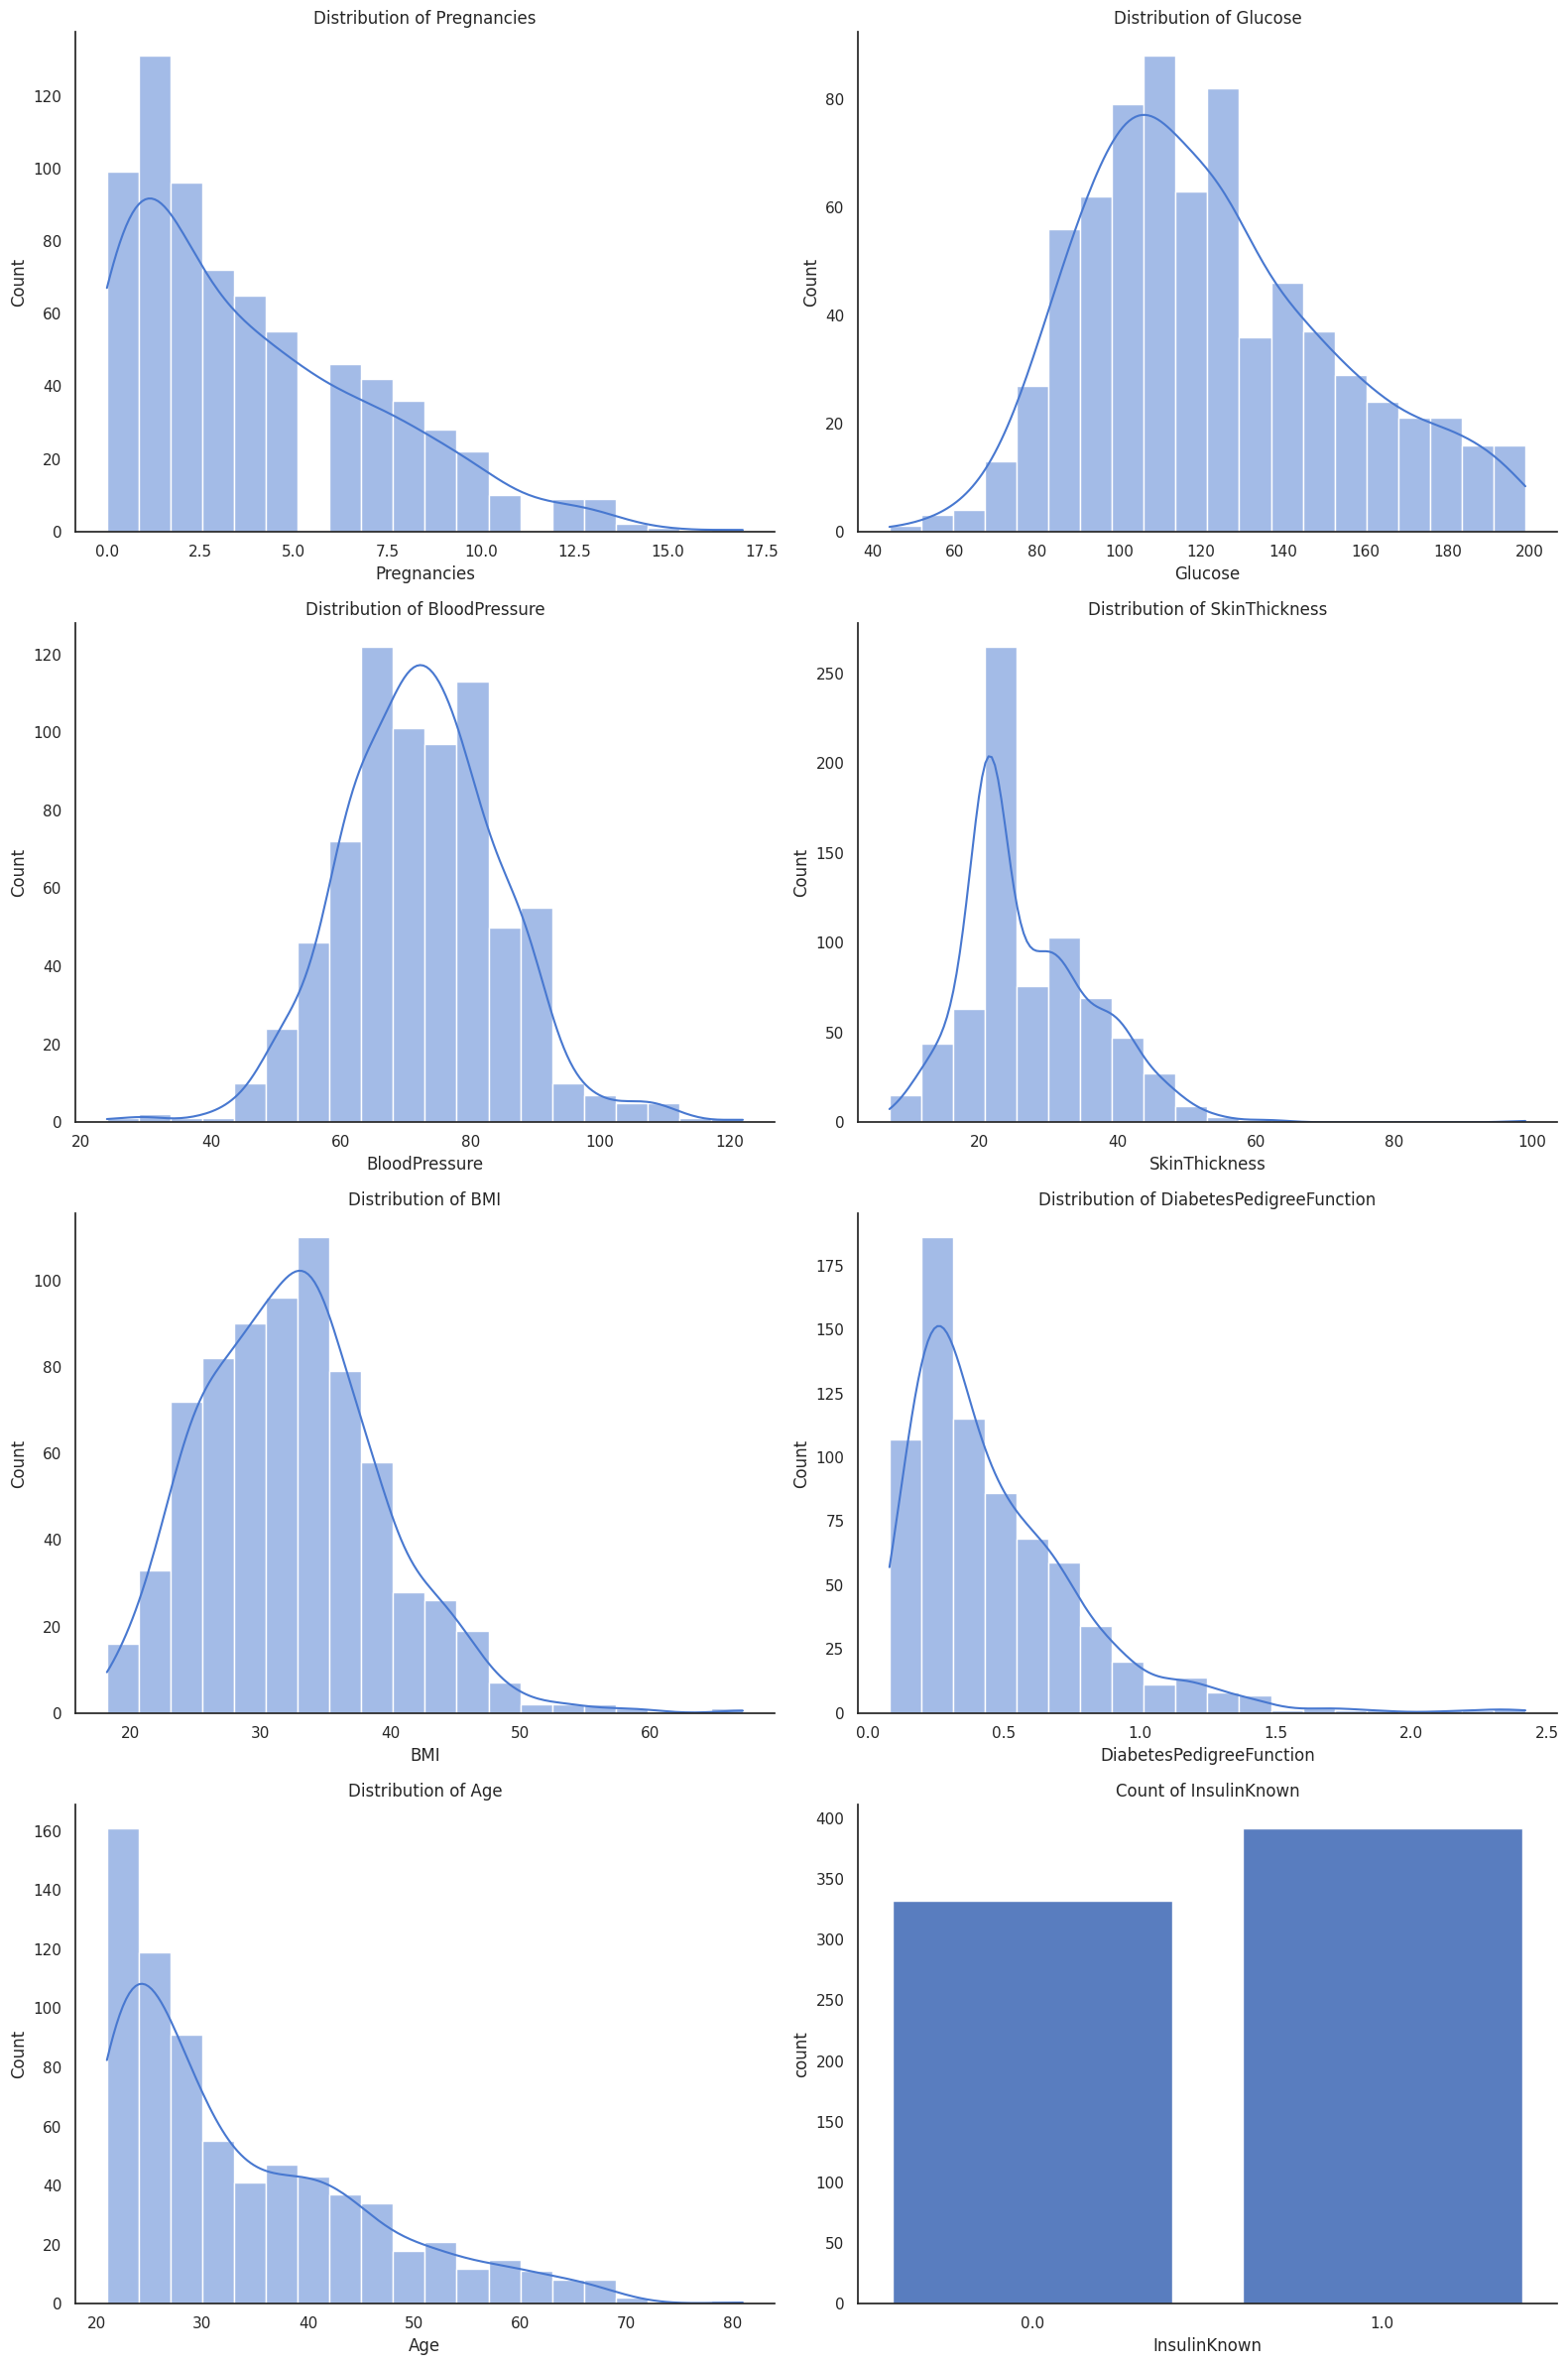

In [55]:
# Filter out the columns that should not be included in the histogram plots
columns_to_plot = [col for col in diabetes_cleaned.columns if col not in ['Outcome', 'InsulinKnown']]

# Number of columns to display histograms in
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(columns_to_plot) + num_cols) // num_cols

plt.figure(figsize=(16, num_rows * 6))  # Adjust the height to fit the number of rows

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=diabetes_cleaned, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

# Add the countplot for InsulinKnown
plt.subplot(num_rows, num_cols, len(columns_to_plot) + 1)
sns.countplot(data=diabetes_cleaned, x='InsulinKnown')
plt.title('Count of InsulinKnown')
sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The <strong>Glucose</strong> and <strong>Blood Pressure</strong> columns follow a normal distribution.</li>
    <li>The <strong>Age</strong>, <strong>Diabetes Pedigree Function</strong>, and <strong>Pregnancies</strong> columns are right-skewed.</li>
    <li>The right-skewness in the <strong>Age</strong> column suggests that the dataset is biased towards younger participants, which might affect the generalizability of the results to older populations.</li>
    <li>The right-skewness in the <strong>Diabetes Pedigree Function</strong> column implies that most participants have a lower genetic risk of diabetes, with a few individuals having a significantly higher risk.</li>
    <li>The right-skewness in the <strong>Pregnancies</strong> column indicates that most women have fewer pregnancies, with a smaller number of women having a higher number of pregnancies.</li>
    </ul>
</div>

<a id="corr"></a>
# <div style="text-align:center; border-radius:20px 20px; padding:7px; color:white; margin:0; font-size:80%; font-family:Pacifico; background-color:#245d96; overflow:hidden"><b> 4.3. Exploring Correlations </b></div>

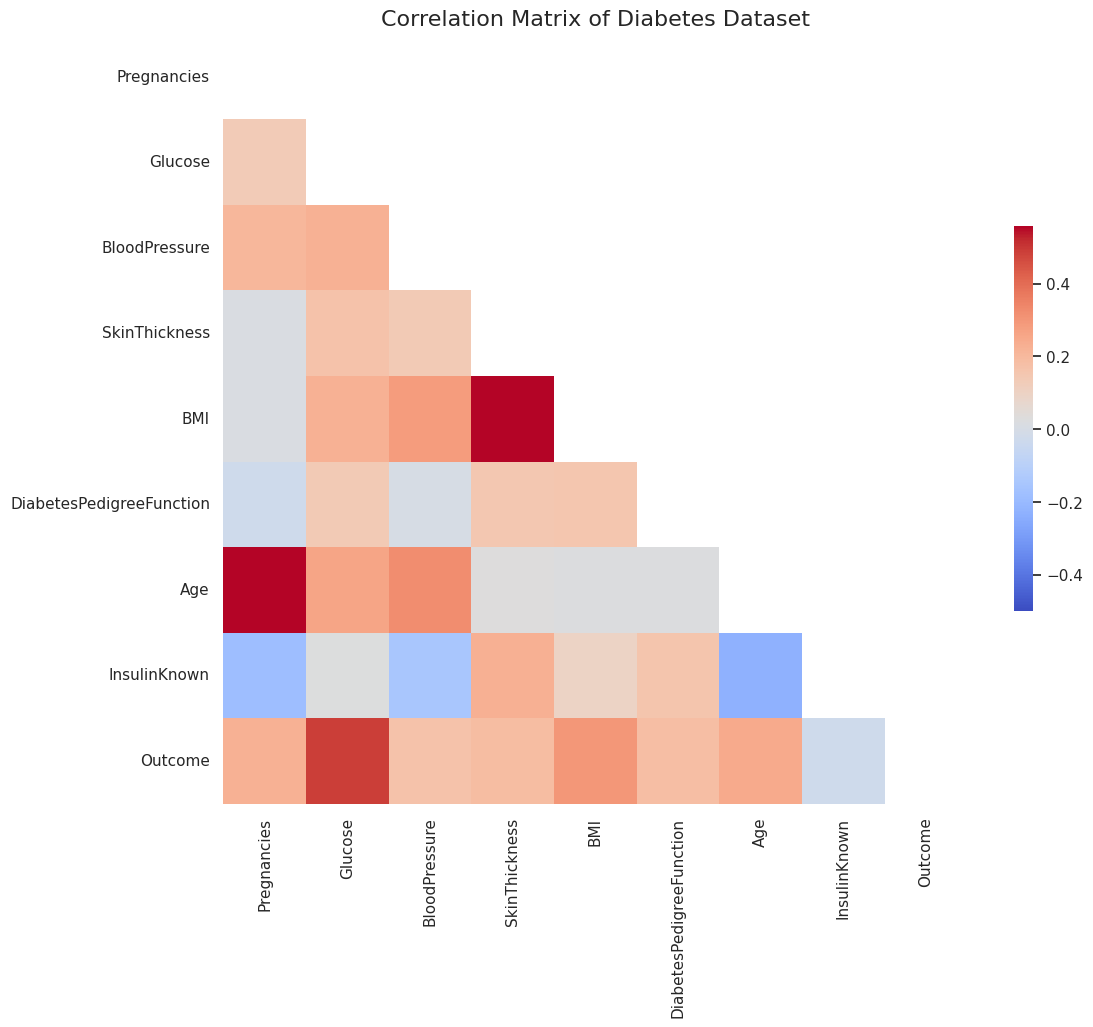

In [56]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(diabetes_cleaned.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_cleaned.corr(),cmap='coolwarm', cbar_kws={"shrink": .5}, vmin=-0.5, mask=mask)

# Add a title to the heatmap
plt.title('Correlation Matrix of Diabetes Dataset', fontsize=16)

plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The highest correlations are observed between:
            <ul>
                <li><strong>BMI</strong> and <strong>SkinThickness</strong>. This suggests that individuals with higher BMI tend to have greater skinfold thickness, which can be an indicator of overall body fat.</li>
                <li><strong>Age</strong> and <strong>Number of Pregnancies</strong>. This is expected, as older women are likely to have had more pregnancies.</li>
                <li><strong>Outcome</strong> (diabetes diagnosis) and <strong>Glucose</strong>. This indicates that higher glucose levels are strongly associated with a diabetes diagnosis, reinforcing the importance of glucose monitoring in diabetes detection and management.</li>
            </ul>
        </li>
        <li>There are noticeable tendencies in scatterplots with hue, where orange dots represent observations with diabetes and blue dots represent cases without diabetes. Specifically, the division is clear in the <strong>Glucose</strong> scatterplots, which confirms conclusions from the heatmap: people with diabetes tend to have higher glucose levels.</li>
    </ul>
</div>

<a id="outliers"></a>
# <div style="text-align:center; border-radius:20px 20px; padding:7px; color:white; margin:0; font-size:80%; font-family:Pacifico; background-color:#245d96; overflow:hidden"><b> 4.4. Exploring Outliers </b></div>

In [57]:
# Select numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']

# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(diabetes_cleaned[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,724.000,724.000,724.000,724.000,724.000,724.000,724.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.150,-2.535,-3.912,-2.089,-2.072,-1.195,-1.050
25%,-0.853,-0.720,-0.679,-0.590,-0.722,-0.692,-0.795
50%,-0.258,-0.159,-0.032,-0.325,-0.010,-0.288,-0.370
75%,0.635,0.655,0.614,0.609,0.600,0.460,0.651
max,3.908,2.510,4.009,7.457,5.031,5.858,4.053


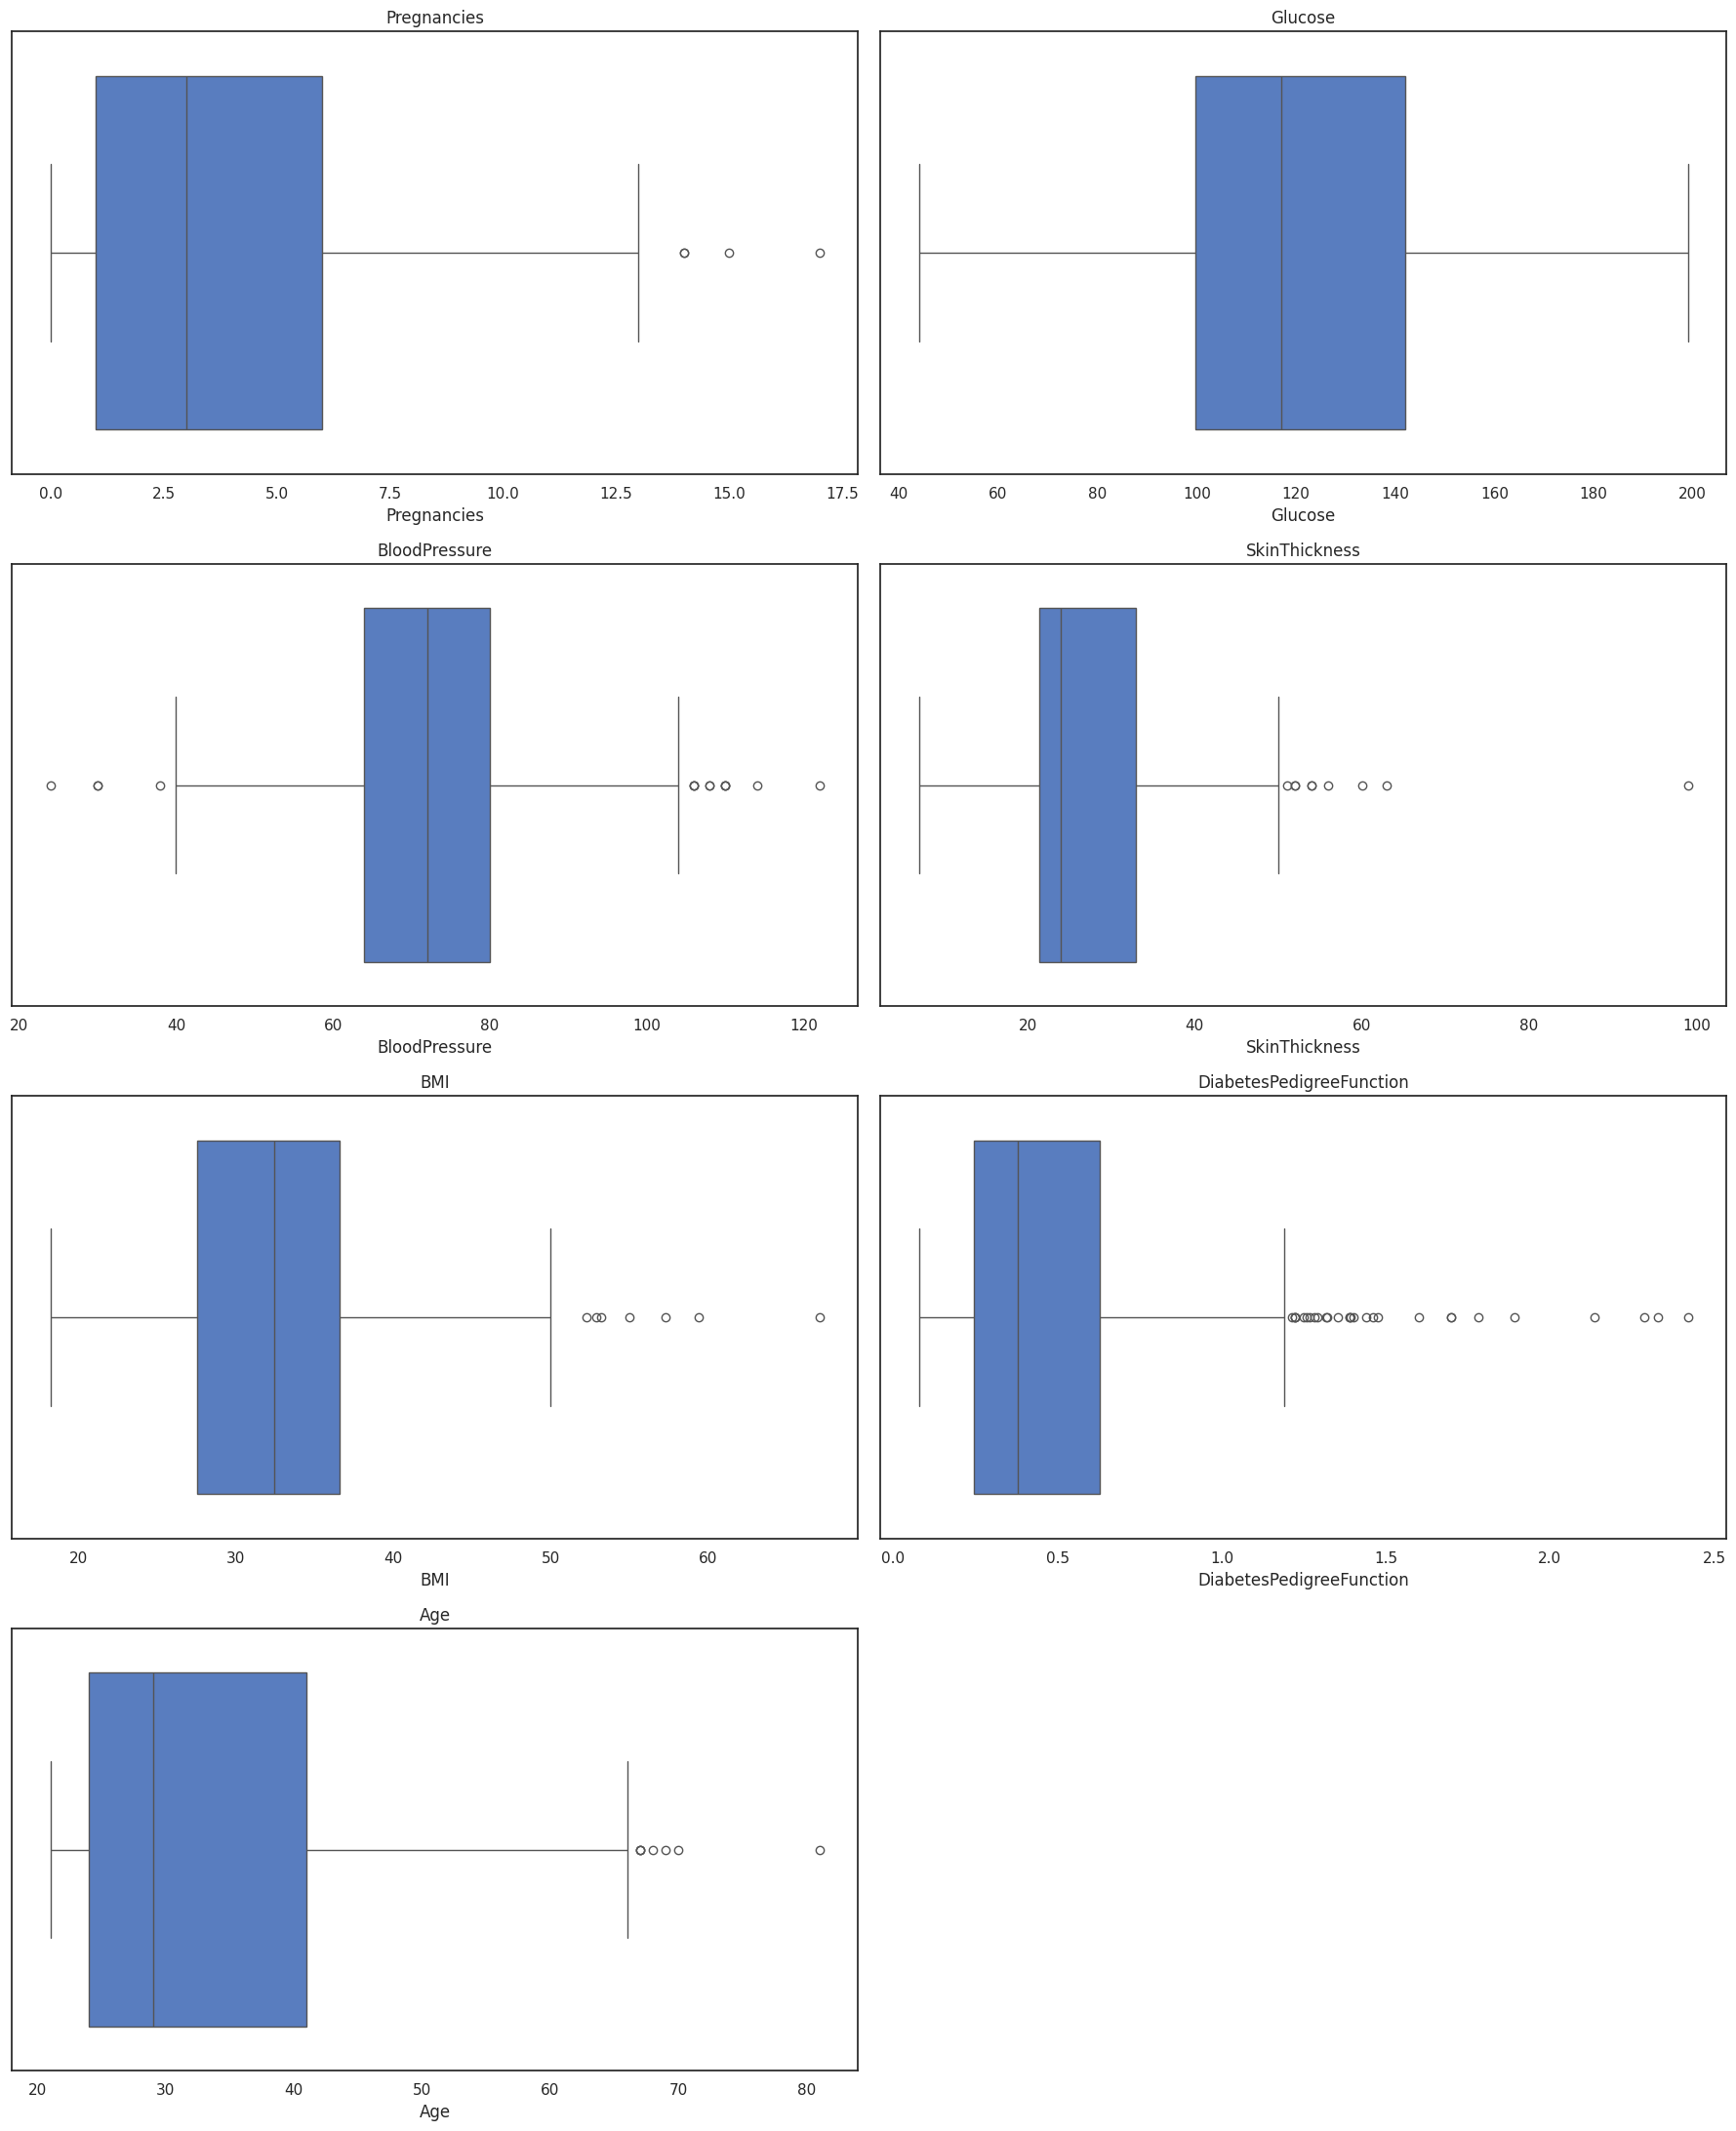

In [58]:
# Create a 4x2 subplot with a figure size of 20x20 inches (only 7 plots will be used)
fig, ax = plt.subplots(4, 2, figsize=(18, 22))

# Flatten the array of axes for easier iteration
ax = ax.flatten()

# Loop through the numerical columns and create a boxplot for each
for idx, column in enumerate(numerical_columns):
    sns.boxplot(ax=ax[idx], x=diabetes_cleaned[column])
    ax[idx].set_title(column)

# Remove the empty subplot (8th plot)
fig.delaxes(ax[-1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>From the z-score analysis and boxplots, we observe outliers in all columns except for Glucose. Let's handle these outliers during the preprocessing step using robust scaling.
        </li>
    </ul>
</div>

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4.5. Distribution of a Target Variable  </b></div>

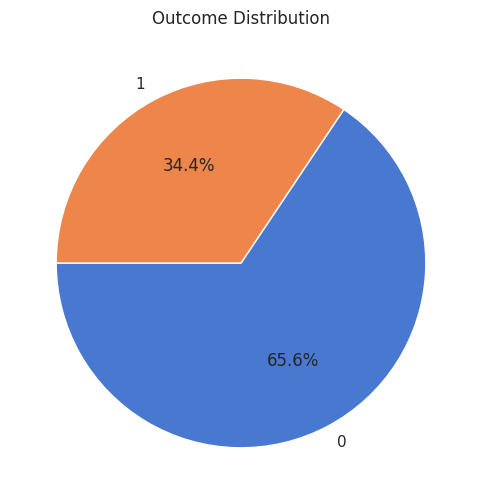

In [59]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = diabetes_cleaned.Outcome.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=180, colors=colors)
plt.title('Outcome Distribution')
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Our target variable is <strong>moderately imbalanced</strong>.</li>
    </ul>
</div>

<a id="prepr"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 5. Data Preprocessing</b></div>

<a id='sep'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 5.1. Separate Features and Target </b></div>

In [60]:
# Separate features (X) and target variable (y)
X = diabetes_cleaned.loc[:, diabetes_cleaned.columns != "Outcome"]
y = diabetes_cleaned['Outcome']

<a id='split'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 5.2. Train / Test Split </b></div>

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<a id='scale'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 5.3. Data Scaling </b></div>

In [62]:
# Apply RobustScaler to handle outliers
scaler = RobustScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


<a id="ml"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 6. Modeling</b></div>

In [63]:
# Instantiate classification models with default parameters
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
}

Random Forest accuracy: 0.78
Logistic Regression accuracy: 0.81


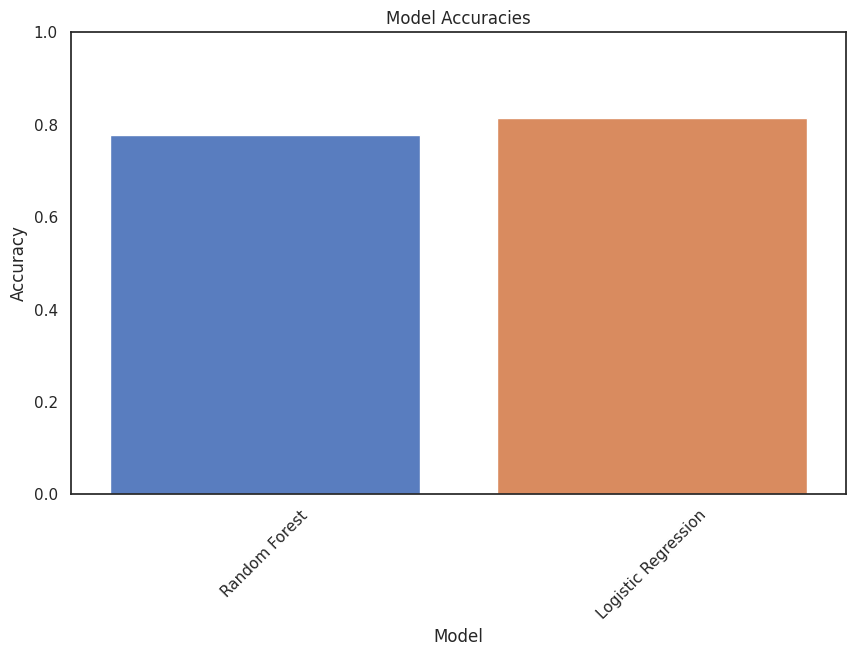

In [64]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='muted')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

<a id='lr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 6.1. Logistic Regression </b></div>

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.7648
Accuracy = 0.8119, F1-score = 0.7800
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       146
           1       0.75      0.65      0.70        72

    accuracy                           0.81       218
   macro avg       0.79      0.77      0.78       218
weighted avg       0.81      0.81      0.81       218



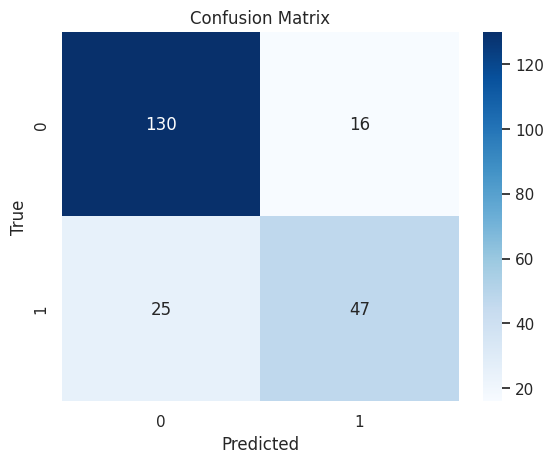

In [65]:
# Define your chosen model
model = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
lr_model = grid_search.best_estimator_
y_pred = lr_model.predict(X_test_scaled)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id='gbc'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 6.2. Random Forest Classifier </b></div>

Accuracy = 0.7569, F1-score = 0.7179
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.65      0.58      0.61        72

    accuracy                           0.76       218
   macro avg       0.73      0.71      0.72       218
weighted avg       0.75      0.76      0.75       218



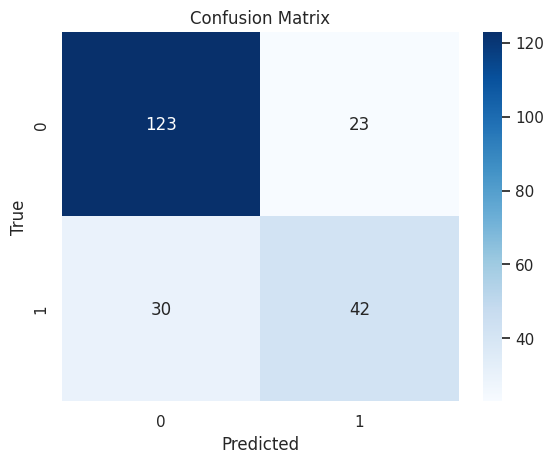

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id='conclusions'></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 7. Conclusions</b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 25px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The best-performing models were <strong>Logistic Regression</strong> </li>
        <li>Their simplicity and reduced risk of overfitting made them more effective than complex algorithms, especially with our limited dataset.</li>
    </ul>
</div>

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>